In [44]:
import numpy as np
import pandas as pd
import networkx as nx
import csv
import matplotlib.pyplot as plt
import collections

In [31]:
mitte_prenz = np.genfromtxt('mitte-prenz-network.txt', skip_header = 9)
mitte_center = np.genfromtxt('mitte-center-network.txt', skip_header = 9)
mylist = ['Init_node','Term_node','Capacity','Length','Free_Flow_Time','B','Power','Speed_limit','Toll','Type', '']

In [32]:
#load in both the center and the prenz to get the mean of our columns
df_center = pd.DataFrame(mitte_center, columns= mylist)
df_prenz  = pd.DataFrame(mitte_prenz, columns= mylist)

In [33]:
print('Center Mean \n \n',df_center.mean(),'\n\n')
print('Prenz Mean \n \n',df_prenz.mean())

Center Mean 
 
 Init_node            185.230769
Term_node            186.041332
Capacity          331719.761194
Length               100.940299
Free_Flow_Time         4.558745
B                      0.669346
Power                  4.000000
Speed_limit            0.000000
Toll                   0.000000
Type                   0.669346
                            NaN
dtype: float64 


Prenz Mean 
 
 Init_node            443.510531
Term_node            443.641026
Capacity          355462.191392
Length               102.898810
Free_Flow_Time         4.308608
B                      0.645604
Power                  4.000000
Speed_limit            0.000000
Toll                   0.000000
Type                   0.645604
                            NaN
dtype: float64


In [34]:
#create an edgelist of the init_node and the term_node, which are start and stop node destinations
with open('edgelist-mitte-prenz.csv', 'w') as csvfile:
    for items in mitte_prenz:
        csvfile.write(str(int(items[0])) + "," + str(int(items[1])) + "\n")
        

with open('edgelist-mitte-center.csv', 'w') as csvfile:
    for items in mitte_center:
        csvfile.write(str(int(items[0])) + "," + str(int(items[1])) + "\n")
        


In [35]:
#initialize graphs from our generated edgelists for both areas
prenz_edgelist=open("edgelist-mitte-prenz.csv", 'rb')
G_prenz=nx.read_edgelist(prenz_edgelist,delimiter = ",")

center_edgelist=open("edgelist-mitte-center.csv", 'rb')
G_center=nx.read_edgelist(center_edgelist,delimiter = ",")
nx.number_connected_components(G_center)

1

In [39]:
def read_bipartite(file_path):

    bpgraph = nx.Graph()

    nodes = []
    edges = {}
    file = open(file_path,'r')
    
    for line in file:
        split = line.split(',')
        n1 = int(float(split[0].strip()))
        n2 = int(float(split[1].strip()))
        bpgraph.add_node(n1, color = 'b', size = 50)
        bpgraph.add_edge(n1,n2)
            
    file.close()
    return bpgraph

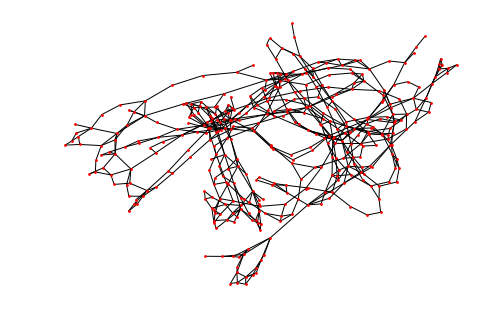

In [41]:
graph1 =read_bipartite("edgelist-mitte-center.csv")
nx.draw(graph1, with_labels=False, node_size=3, node_color='red')
plt.show(graph1)


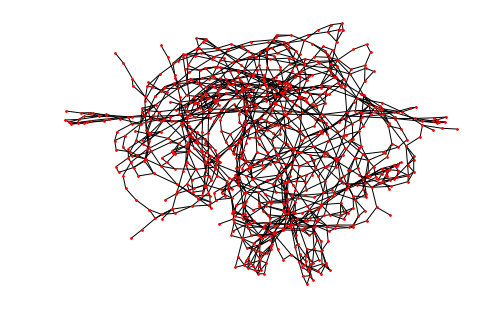

In [42]:
graph2 =read_bipartite("edgelist-mitte-prenz.csv")
nx.draw(graph2, with_labels=False, node_size=3, node_color='red')
plt.show(graph2)

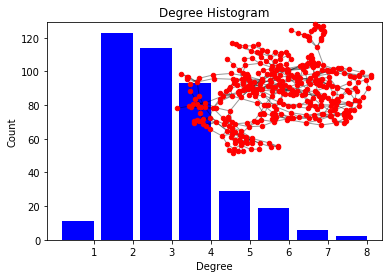

In [45]:
degree_sequence = sorted([d for n, d in G_center.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G_center), key=len, reverse=True)[0]
pos = nx.spring_layout(G_center)
plt.axis('off')
nx.draw_networkx_nodes(G_center, pos, node_size=20)
nx.draw_networkx_edges(G_center, pos, alpha=0.4)

plt.show()

In [46]:
nx.average_node_connectivity(G_center)

2.1457013459532353